# **DEDA Unit 5** : Basic Statistics and Visualisation in Python

### **Interactive Graphs** 


In [6]:
"""
Plotly enables Python users to create beautiful interactive visualisations.
"""

# pip install yfinance
from datetime import datetime, timedelta
import pandas as pd
import plotly.graph_objects as go
import yfinance as yf


CURRENCY = 'EUR'

def getData(crypto):
  # Define time window
    now = datetime.now()
    current_date = now.strftime("%Y-%m-%d")
    last_year_date = (now - timedelta(days=365)).strftime("%Y-%m-%d")

    start = pd.to_datetime(last_year_date)
    end = pd.to_datetime(current_date)

    data = yf.download(tickers=f'{crypto}-{CURRENCY}', start = start, end = end , interval = '1d')

    return data

# Call function to retrieve data on Bitcoin 
btc_data = getData('BTC')
# eth_data = getData('ETH')

# Plot graph
fig = go.Figure(
        data = [
            go.Candlestick(
                x = btc_data.index,
                open = btc_data.Open,
                high = btc_data.High,
                low = btc_data.Low,
                close = btc_data.Close
            ) 
        ] )
fig.update_layout(
    title = f'Time Series with Range slider for BTC',
    xaxis_title = 'Date',
    yaxis_title = f'Price ({CURRENCY})',
    xaxis_rangeslider_visible = True
)
fig.update_yaxes(tickprefix=CURRENCY)

fig.show()

[*********************100%***********************]  1 of 1 completed


### **Matrix Operations** 

In [ ]:
"""
NumPy allows for many matrix operations.The inalg.inv() computes the (multiplicative) inverse of a matrix. The dot() method returns the dot product of two arrays. Identity() returns the identity array and eye() returns a  two-dimensional  array with ones on the diagonal and zeros elsewhere.
"""
# Note: A here is the random matrix from above

A_inv = np.linalg.inv(A) # Inverse matrix
print(A_inv)

dot_result = np.dot(A, A_inv) # Matrix multiplication operation
print(dot_result)

idn_matrix = np.identity(20) # Generate a 20*20 identity matrix
print(idn_matrix)

# Using .allclose() function to evaluate two matrices are equal within tolerance
np.allclose(dot_result, np.eye(20))  # True

[[-1.17857091e-02  1.61581645e-02 -2.29238681e-02  6.46169271e-02
  -1.86569736e-02 -7.06947029e-02 -6.46308959e-02  7.27499572e-02
   9.49731627e-02  7.23232775e-02 -6.10085502e-02  1.38081695e-02
  -7.50557390e-02 -2.37016984e-02  2.51202892e-02 -6.68707846e-02
  -2.67481583e-02  4.71002132e-02  2.57303589e-02 -1.39043814e-02]
 [ 3.95388546e-02 -1.76348320e-03 -2.47743130e-02 -3.14551529e-02
  -1.11332287e-02  1.22117158e-02  6.07152048e-03 -4.13552144e-02
  -2.59925632e-02  2.54118448e-03  3.97887165e-03 -1.23557012e-02
   1.86903778e-02  2.04773654e-02 -2.22176075e-02  1.04563187e-02
   3.29379374e-02  9.88608991e-03 -1.27016465e-02  2.16227831e-02]
 [-6.92166911e-03 -7.65321149e-03  1.42704229e-02 -1.78523235e-02
  -5.32620076e-03  1.45722530e-02  1.30172879e-02 -2.42729218e-02
  -2.18236370e-02 -1.54436493e-02  1.25144690e-02  3.68875233e-03
   2.00810605e-02  1.49344619e-03 -1.10492050e-02  3.34926194e-02
   1.53667218e-02 -1.37743139e-02 -5.99980388e-03  5.74800647e-03]
 [ 1.99

True

### **Eigenvalues** 

In [ ]:
"""
The transpose() function from Numpy can be used to calculate the transpose of a matrix. The linalg.eig() method computes the eigenvalues of a squared array while diag() extracts a diagonal or construct a diagonal array.
"""
A = [[3, 1],[1, 1]] # [[3, 1],[1, 1]] would create a 2x2 matrix

A_eig = np.linalg.eig(A)
# Now the Jordan decomposition A = Gamma*Lambda*Gamma^T
E_val = A_eig[0]
Gamma = A_eig[1]
Lambda = np.diag(E_val)

# Check the result, you might get something within numerical eps
AA = np.dot( np.dot(Gamma, Lambda), np.transpose(Gamma) )
print( np.allclose(AA, A) )  # True

# Calculation of the square root of A
Lambda12 = np.sqrt(Lambda)
A12 = np.dot( np.dot(Gamma, Lambda12), np.transpose(Gamma) )

True


### **Fourier Transformation** 

In [ ]:
from PIL import Image
from numpy.fft import fft,ifft
import numpy as np

# Open the image by using Python Imaging Library(PIL)
image_before=Image.open(‘berlin_view.jpg')
# Decoding and encoding image to float number
image_int=np.fromstring(image_before.tobytes(), dtype=np.int8)
# Processing Fourier transform
fft_transformed=fft(image_int)
# Filter the lower frequency, i.e. employ a high pass
fft_transformed=np.where(np.absolute(fft_transformed) < 9e4,0,fft_transformed)
# Inverse Fourier transform
fft_transformed=ifft(fft_transformed)
# Keep the real part
fft_transformed=np.int8(np.real(fft_transformed))
# Output the image
image_output=Image.frombytes(image_before.mode, image_before.size, fft_transformed)
image_output.show()

### **Normal Distribution** 

In [ ]:
"""
To create an inert active plot for the probability and cumulative density function of the normal distribution we use the Plotly package. 
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
from ipywidgets import interact, interactive, fixed, interact_manual

# Set up figure size of plot 
plt.rcParams['figure.figsize'] = (10,8) # length and width 
plt.rcParams['figure.dpi'] = 120 # general box size


In [ ]:
"""
We define the general environment of our plot: size, colour and style. 
"""

# Plot the cdf and pdf in one figure
def f(mu,sigma, colour):

  fig = plt.figure(figsize=(10, 8))

  fig.subplots_adjust( hspace = 0.3)
  fig.patch.set_facecolor('#eeefef')
  plt.style.use('classic')

  # upper plot: pdf
  plt.subplot(2, 1, 1)  # (rows, columns, which one)
  x_axis = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
  plt.plot(x_axis, stats.norm.pdf(x_axis, mu, sigma), c= colour, linewidth= 2)
  plt.xlabel('X')
  plt.ylabel('pdf')
  plt.ylim(0,1)
  plt.xlim(-10,10)
  plt.title(f'Probability Density Function pdf for $\mu= {mu}$ and $\sigma= {round(sigma,2)}$', fontweight="bold")
  # lower plot: cdf
  plt.subplot(2, 1, 2)
  plt.plot(x_axis, stats.norm.cdf(x_axis, mu, sigma), c= colour, linewidth= 2)
  plt.xlabel('X')
  plt.ylabel('cdf') 
  plt.ylim(0,1)
  plt.xlim(-10,10)
  plt.title(f'Cumulative Density Function cdf for $\mu= {mu}$ and $\sigma= {round(sigma,2)}$', fontweight="bold")

colours = ['red', 'green', 'blue']
interact(f, mu=(-10, 10,1), sigma=(0.5, 5, 0.5), colour = colours)
plt.savefig("filename.png", transparent=True)



interactive(children=(IntSlider(value=0, description='mu', max=10, min=-10), FloatSlider(value=2.5, descriptio…

<Figure size 640x480 with 0 Axes>

### **Kerner Density Estimation**  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# Code reference: http://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html

# Set up figure size of plot 
plt.rcParams['figure.figsize'] = (10,8) # length and width 
plt.rcParams['figure.dpi'] = 120 # general box size

N = 2000
np.random.seed(1)
# Create 2 normal distributed data set
lambda_ = 0.3 # convex combination parameter
norm_data_1 = np.random.normal(0, 1, int(lambda_ * N))
norm_data_2 = np.random.normal(5, 1, int((1-lambda_) * N))
norm_data = np.concatenate((norm_data_1, norm_data_2))

# Create x axis range
X_plot = np.linspace(-5, 10, 1000)
# Create linear combination of 2 normal distributed random variable
norm_linear = (lambda_ * norm(0, 1).pdf(X_plot) + (1-lambda_) * norm(5, 1).pdf(X_plot))

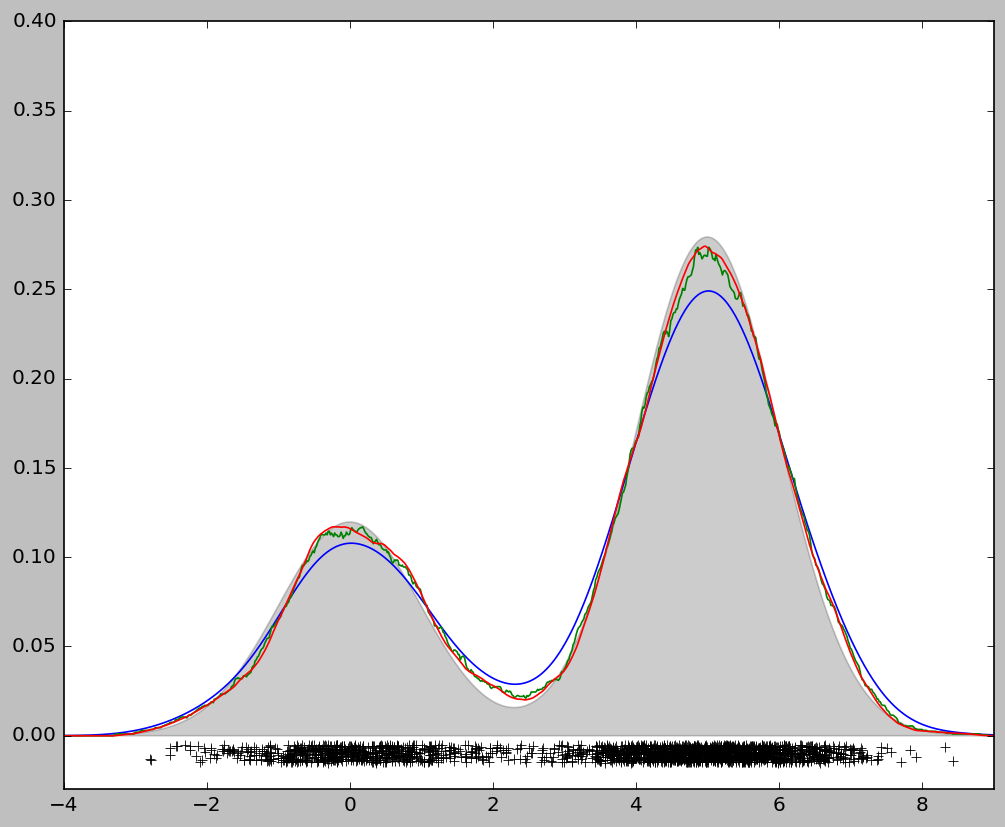

In [ ]:
fig, ax = plt.subplots()

# Plot the real distribution
ax.fill(X_plot, norm_linear, fc='black', alpha=0.2, label='convex combination')

# Use 3 different kernels to estimate
for kernel in ['gaussian', 'tophat', 'epanechnikov']:

    # Initial an object to use kernel function to fit data, bandwidth will    affect the result
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(norm_data.reshape(-1, 1))

    # Evaluate the density model on the data
    log_dens = kde.score_samples(X_plot.reshape(-1, 1))
    ax.plot(X_plot, np.exp(log_dens), '-', label="'{0}'".format(kernel))

# Add text on the plot, position argument can be arbitrary
# ax.text(6, 0.38, "N={0} points".format(N))
# Add a legend to the left outside of the plot 
# ax.legend(loc='upper left', bbox_to_anchor = (1,0.5))
# Plot the random points, squeeze them into narrow space
ax.plot(norm_data, -0.005 - 0.01 * np.random.random(norm_data.shape[0]), '+k')
# Set x-axis y-axis limit to adjust the figure
ax.set_xlim(-4, 9)
ax.set_ylim(-0.03, 0.4)
fig.savefig('kernel_estimation.png', dpi=300, transparent = True, bbox_inches='tight')
plt.show()

### **Box-Muller Method on 2-dim normal distribution**  

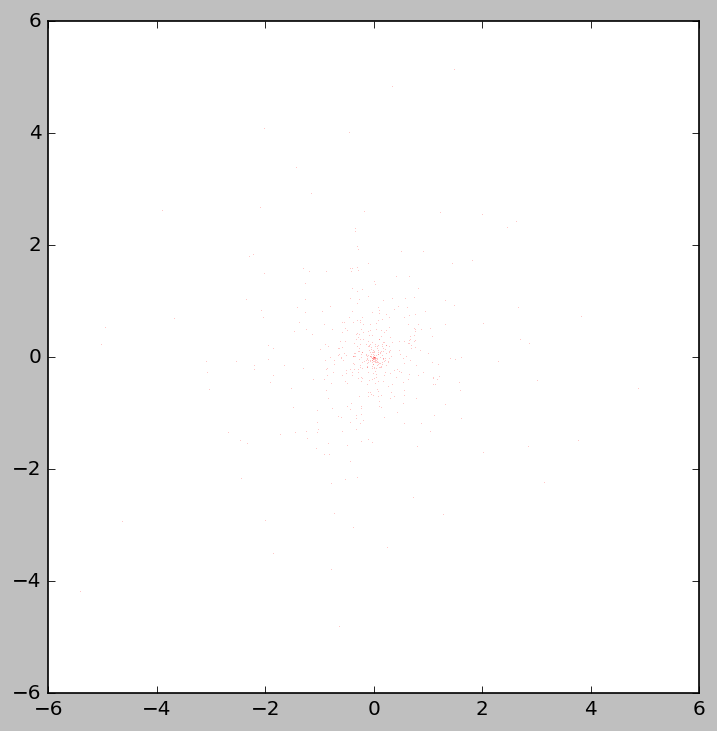

In [ ]:
"""
Using the Box-Muller Method to generate 2-dim normally distributed variables. 
"""
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(100) 
# For mu = (0,0), covariance matrix Sigma = identity matrix
n = 500  # Number of random numbers
msize = 0.1  # determines the size of the plotted points
# a good size might be msize=5 for n=500 pts and msize=0.1 for n>50K  
a = np.random.exponential(scale=1, size=n)
phi = np.random.uniform(low=0, high=2 * np.pi, size=n)

# Change to cartesian coordinates
x = a * np.cos(phi)
y = a * np.sin(phi)

plt.figure(figsize=(7, 7))
plt.plot(x, y,'.r', markersize=msize)
plt.savefig('2dimnormal.png', dpi = 300, transparent = True)

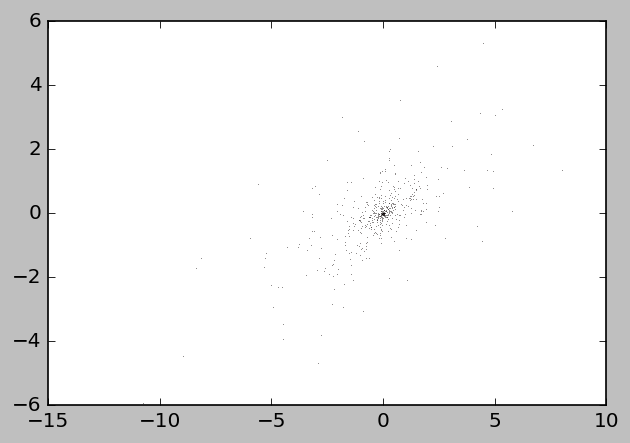

In [ ]:
"""
For covariance matrix Sigma = A: Y = X/sqrt(Sigma) ~ N(0,I) => Y*sqrt(Sigma)
"""
# Calculate sqrt(A) with Jordan decomposition
A = [[3, 1], [1, 1]]
A_eig = np.linalg.eig(A)
E_val = A_eig[0]
Gamma = A_eig[1]
Lambda = np.diag(E_val)
np.sqrt(Lambda)
Lambda12 = np.sqrt(Lambda)
A12 = np.dot(np.dot(Gamma, Lambda12), np.transpose(Gamma))

# Solve with matrix multiplication
c = [x, y]
tfxy = np.dot(A12, c)

plt.figure(2, figsize=(6, 4))
plt.plot(tfxy[0], tfxy[1], 'ro', markersize=msize)